# Project: Investigate a Dataset (TMDb Movie Dataset)

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction
As we know entertinment industry is growing very fast. Peolpe are more attracted to the movies. For people this is the best way to release their strees and enjoy the present. There are couple of movies from which peoples are connecting. This investingation help the movie makers to understand the customer thinking and thier emotions.


# Questions to Answer
<ul>
    <li> What are top 10 movies according to rating?</li>
    <li> What the impact of rutime on the revenue?</li>
    <li> Which genere most of people love to watch?</li>
    <li> How is growth rate of entertinment industry over year?</li>
    <li> What's the impact on rutime over year? </li>
    <li> Which category of movie most peole watch as per rating? </li>
</ul>

In [160]:
%matplotlib inline
import pandas as pd
from pandas import Series
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

<a id='wrangling'></a>
## Data Wrangling

In this section of the report, you will load in the data, check for cleanliness, and then trim and clean your dataset for analysis. Make sure that you document your steps carefully and justify your cleaning decisions.

### General Properties

In [161]:
df=pd.read_csv('movies.csv')
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


### Get the number of entry and column

In [162]:
print("No. Entry {} and toltal column {} ".format(df.shape[0],df.shape[1]))

No. Entry 10866 and toltal column 21 


## Brief Description of DataSet
1.id - Unique id's for each row

2.imdb_id - System generated unique id

3.popularity - popularity score

4.budget - budget in dollars

5.revenue - revenue in dollars

6.original_title - Movie title

7.cast - cast performed in movie

8.homepage - website link of movie

9.director - director name

10.tagline - tagline of movie

11.keywords - words used to give significant idea

12.overview - general review of movie

13.runtime - movie duration in seconds

14.genres - categories of movie

15.production_companies - company name which manages a movie process from start to finish

16.release_date - movie releasing date

17.vote_count - votes given by viewers

18.vote_average - average votes given by viewers

19.release_year - movie releasing year

20.budget_adj-budget in 2010 dollars,accounting for inflation

21.revenue_adj -revenue in 2010 dollars,accounting for inflation

In [163]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002AF5AAE9F08>,
      dtype=object)

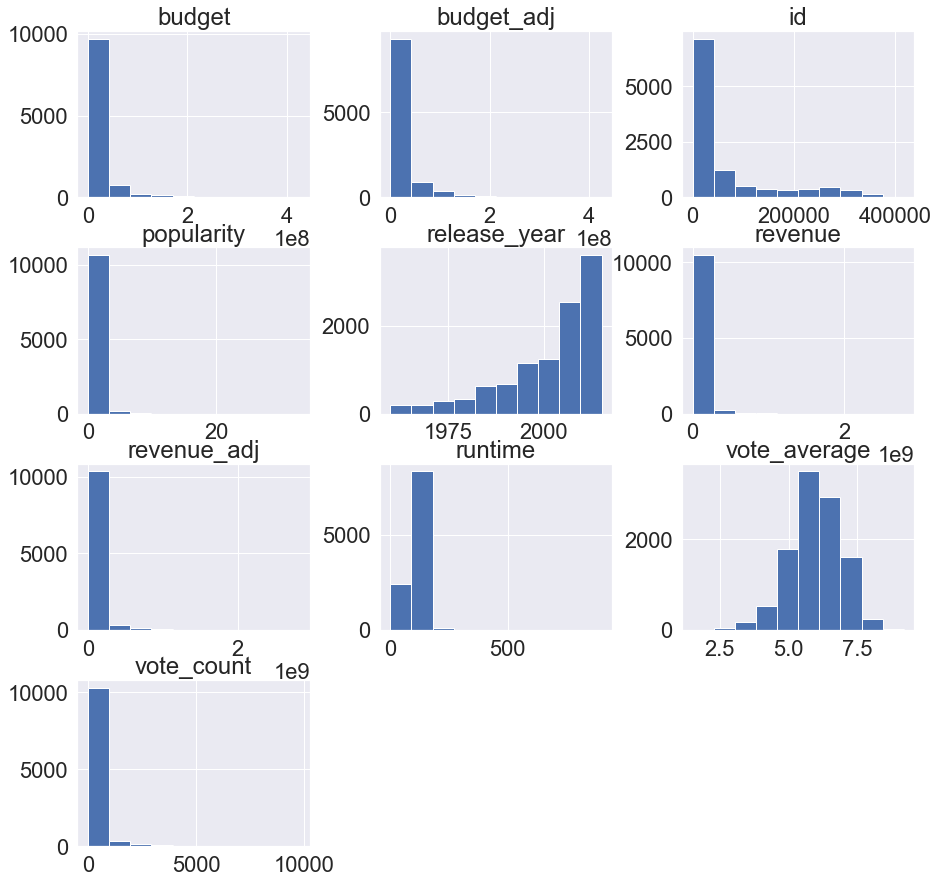

In [164]:
df.hist(figsize=(15,15))

### Data Cleaning
  #### Removing unwanted column

In [165]:
del_column=['id','imdb_id','cast','homepage','tagline','keywords','overview','production_companies','budget_adj','revenue_adj']
df_drop=df.drop(del_column,axis=1)


In [166]:
df_drop.head()

,popularity,budget,revenue,original_title,director,runtime,genres,release_date,vote_count,vote_average,release_year
0,32.985763,150000000,1513528810,Jurassic World,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,6/9/15,5562,6.5,2015
1,28.419936,150000000,378436354,Mad Max: Fury Road,George Miller,120,Action|Adventure|Science Fiction|Thriller,5/13/15,6185,7.1,2015
2,13.112507,110000000,295238201,Insurgent,Robert Schwentke,119,Adventure|Science Fiction|Thriller,3/18/15,2480,6.3,2015
3,11.173104,200000000,2068178225,Star Wars: The Force Awakens,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,12/15/15,5292,7.5,2015
4,9.335014,190000000,1506249360,Furious 7,James Wan,137,Action|Crime|Thriller,4/1/15,2947,7.3,2015


In [167]:
df_drop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   popularity      10866 non-null  float64
 1   budget          10866 non-null  int64  
 2   revenue         10866 non-null  int64  
 3   original_title  10866 non-null  object 
 4   director        10822 non-null  object 
 5   runtime         10866 non-null  int64  
 6   genres          10843 non-null  object 
 7   release_date    10866 non-null  object 
 8   vote_count      10866 non-null  int64  
 9   vote_average    10866 non-null  float64
 10  release_year    10866 non-null  int64  
dtypes: float64(2), int64(5), object(4)
memory usage: 933.9+ KB


In [168]:
df_drop.describe()

,popularity,budget,revenue,runtime,vote_count,vote_average,release_year
count,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000
mean,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658
std,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941
min,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000
25%,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000
50%,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000
75%,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000
max,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000


In [169]:
df_drop.isnull().sum()

popularity         0
budget             0
revenue            0
original_title     0
director          44
runtime            0
genres            23
release_date       0
vote_count         0
vote_average       0
release_year       0
dtype: int64

In [170]:
df_drop[df_drop.duplicated()].sum()

popularity                                            0.59643
budget                                               30000000
revenue                                                967000
original_title                                         TEKKEN
director                                     Dwight H. Little
runtime                                                    92
genres            Crime|Drama|Action|Thriller|Science Fiction
release_date                                          3/20/10
vote_count                                                110
vote_average                                                5
release_year                                             2010
dtype: object

In [171]:
# Changing the Data type of release date
df_drop['release_date'] = pd.to_datetime(df['release_date'])

In [172]:
df_drop.dtypes

popularity               float64
budget                     int64
revenue                    int64
original_title            object
director                  object
runtime                    int64
genres                    object
release_date      datetime64[ns]
vote_count                 int64
vote_average             float64
release_year               int64
dtype: object

In [173]:
df_drop.fillna(df_drop.mean())

,popularity,budget,revenue,original_title,director,runtime,genres,release_date,vote_count,vote_average,release_year
0,32.985763,150000000,1513528810,Jurassic World,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,2015-06-09,5562,6.5,2015
1,28.419936,150000000,378436354,Mad Max: Fury Road,George Miller,120,Action|Adventure|Science Fiction|Thriller,2015-05-13,6185,7.1,2015
2,13.112507,110000000,295238201,Insurgent,Robert Schwentke,119,Adventure|Science Fiction|Thriller,2015-03-18,2480,6.3,2015
3,11.173104,200000000,2068178225,Star Wars: The Force Awakens,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,2015-12-15,5292,7.5,2015
4,9.335014,190000000,1506249360,Furious 7,James Wan,137,Action|Crime|Thriller,2015-04-01,2947,7.3,2015
...,...,...,...,...,...,...,...,...,...,...,...
10861,0.080598,0,0,The Endless Summer,Bruce Brown,95,Documentary,2066-06-15,11,7.4,1966
10862,0.065543,0,0,Grand Prix,John Frankenheimer,176,Action|Adventure|Drama,2066-12-21,20,5.7,1966
10863,0.065141,0,0,Beregis Avtomobilya,Eldar Ryazanov,94,Mystery|Comedy,2066-01-01,11,6.5,1966
10864,0.064317,0,0,"What's Up, Tiger Lily?",Woody Allen,80,Action|Comedy,2066-11-02,22,5.4,1966


In [174]:
df_drop.dropna(how='all',inplace=True)

In [175]:
df_drop.head()

,popularity,budget,revenue,original_title,director,runtime,genres,release_date,vote_count,vote_average,release_year
0,32.985763,150000000,1513528810,Jurassic World,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,2015-06-09,5562,6.5,2015
1,28.419936,150000000,378436354,Mad Max: Fury Road,George Miller,120,Action|Adventure|Science Fiction|Thriller,2015-05-13,6185,7.1,2015
2,13.112507,110000000,295238201,Insurgent,Robert Schwentke,119,Adventure|Science Fiction|Thriller,2015-03-18,2480,6.3,2015
3,11.173104,200000000,2068178225,Star Wars: The Force Awakens,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,2015-12-15,5292,7.5,2015
4,9.335014,190000000,1506249360,Furious 7,James Wan,137,Action|Crime|Thriller,2015-04-01,2947,7.3,2015


In [176]:
df_drop.describe()['vote_average']

count    10866.000000
mean         5.974922
std          0.935142
min          1.500000
25%          5.400000
50%          6.000000
75%          6.600000
max          9.200000
Name: vote_average, dtype: float64

#### Adding extra column 

In [177]:
# From above observation get movie rating 
edges = [.5,5.4,6.0,6.6,9.2] 
names = ['Low','Medium','Above Average','High'] # Name of categories
df_drop['movie_rating'] = pd.cut(df_drop['vote_average'], edges, labels=names)
df_drop.head()

,popularity,budget,revenue,original_title,director,runtime,genres,release_date,vote_count,vote_average,release_year,movie_rating
0,32.985763,150000000,1513528810,Jurassic World,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,2015-06-09,5562,6.5,2015,Above Average
1,28.419936,150000000,378436354,Mad Max: Fury Road,George Miller,120,Action|Adventure|Science Fiction|Thriller,2015-05-13,6185,7.1,2015,High
2,13.112507,110000000,295238201,Insurgent,Robert Schwentke,119,Adventure|Science Fiction|Thriller,2015-03-18,2480,6.3,2015,Above Average
3,11.173104,200000000,2068178225,Star Wars: The Force Awakens,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,2015-12-15,5292,7.5,2015,High
4,9.335014,190000000,1506249360,Furious 7,James Wan,137,Action|Crime|Thriller,2015-04-01,2947,7.3,2015,High


<a id='eda'></a>
## Exploratory Data Analysis

 Now that data is trimmed and cleaned, we're ready to move on to exploration. Compute statistics and create visualizations with the goal of addressing the research questions that you posed in the Introduction section. It is recommended that you be systematic with your approach. Look at one variable at a time, and then follow it up by looking at relationships between variables.

### Research Question 1 (What are top 10 movies according to rating?)
> In this plot we are extrating top 10 movies from dataset on basis of vote average or we can say on the basis of rating given by public.

In [178]:
df_top10=df_drop.nlargest(10,'vote_average')
df_top10.head()

,popularity,budget,revenue,original_title,director,runtime,genres,release_date,vote_count,vote_average,release_year,movie_rating
3894,0.006925,0,0,The Story of Film: An Odyssey,Mark Cousins,900,Documentary,2011-09-03,14,9.2,2011,High
538,0.114264,0,0,The Mask You Live In,Jennifer Siebel Newsom,88,Documentary,2015-01-01,11,8.9,2015,High
1200,0.129531,0,0,Black Mirror: White Christmas,Carl Tibbetts,74,Drama|Horror|Mystery|Science Fiction|Thriller,2014-12-16,41,8.8,2014,High
2269,0.222293,0,0,Life Cycles,Derek Frankowski,47,Documentary,2010-10-02,27,8.8,2010,High
6911,0.212010,0,0,Pink Floyd: Pulse,David Mallet,145,Music,2006-07-09,23,8.7,2006,High


In [179]:
df_top10.describe()['vote_average']

count    10.00000
mean      8.70000
std       0.23094
min       8.50000
25%       8.50000
50%       8.65000
75%       8.80000
max       9.20000
Name: vote_average, dtype: float64

Text(0.5, 1.0, 'Top 10 Movie by People Rating')

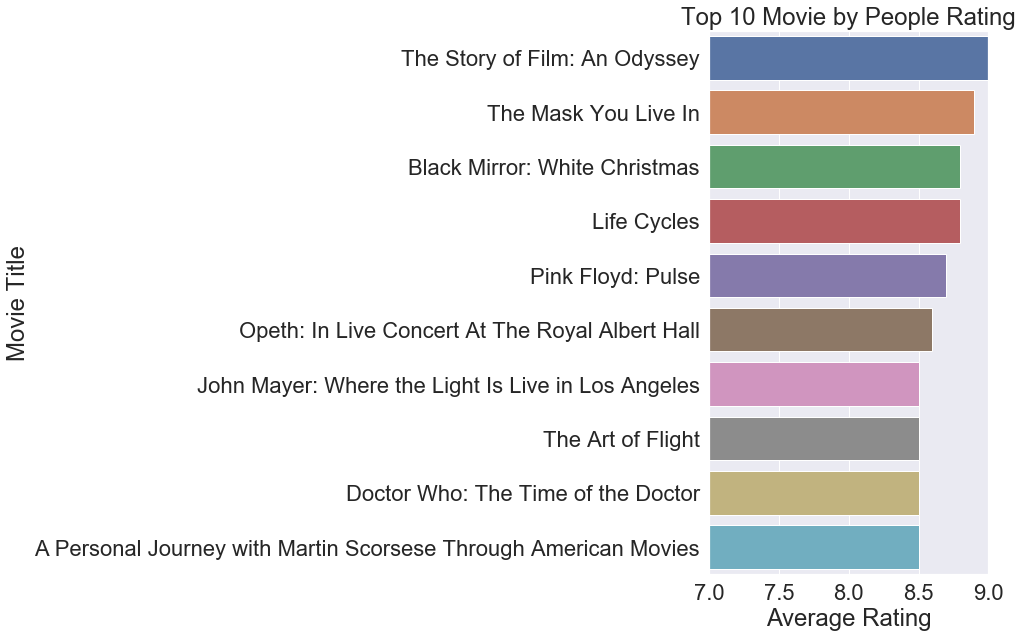

In [180]:
sns.set(style="darkgrid");
sns.set(font_scale=2);
fx,ax=plt.subplots(figsize=(5,10));
ax=sns.barplot(x='vote_average',y='original_title',data=df_top10);
ax.set(xlim=(7,9),ylabel="Movie Title",xlabel="Average Rating");
plt.title("Top 10 Movie by People Rating")

### Research Question 2 (What the impact of rutime on the revenue?)
> In this we are cheching or seeing the impact of rutime on revenue. As we can see in plot if rutime is greter than 2 hour revenue is very less.

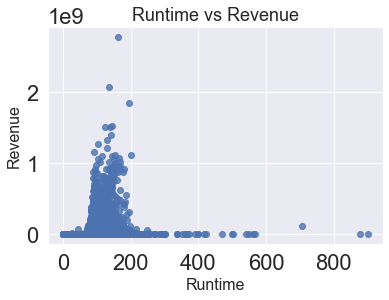

In [181]:
sns.regplot(x = df['runtime'], y = df['revenue'], fit_reg = False)
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 16
fig_size[1] = 8
plt.rcParams["figure.figsize"] = fig_size
plt.title('Runtime vs Revenue', fontsize = 18)
plt.xlabel('Runtime', fontsize = 16)
plt.ylabel('Revenue', fontsize = 16);

### Research Question 3 (Which genere most of people love to watch?)
> As we know every person have there own tastes of movie. So, in this we try to figure out which genre most of people love over years.

In [182]:
df_clean=df_drop

In [183]:
df_clean.head()

,popularity,budget,revenue,original_title,director,runtime,genres,release_date,vote_count,vote_average,release_year,movie_rating
0,32.985763,150000000,1513528810,Jurassic World,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,2015-06-09,5562,6.5,2015,Above Average
1,28.419936,150000000,378436354,Mad Max: Fury Road,George Miller,120,Action|Adventure|Science Fiction|Thriller,2015-05-13,6185,7.1,2015,High
2,13.112507,110000000,295238201,Insurgent,Robert Schwentke,119,Adventure|Science Fiction|Thriller,2015-03-18,2480,6.3,2015,Above Average
3,11.173104,200000000,2068178225,Star Wars: The Force Awakens,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,2015-12-15,5292,7.5,2015,High
4,9.335014,190000000,1506249360,Furious 7,James Wan,137,Action|Crime|Thriller,2015-04-01,2947,7.3,2015,High


C:\Users\sshrima1\Anaconda3\lib\site-packages\seaborn\categorical.py:3669: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\sshrima1\Anaconda3\lib\site-packages\seaborn\categorical.py:3675: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


Text(0.5, 0.98, '# of Movies by Genres Per Year')

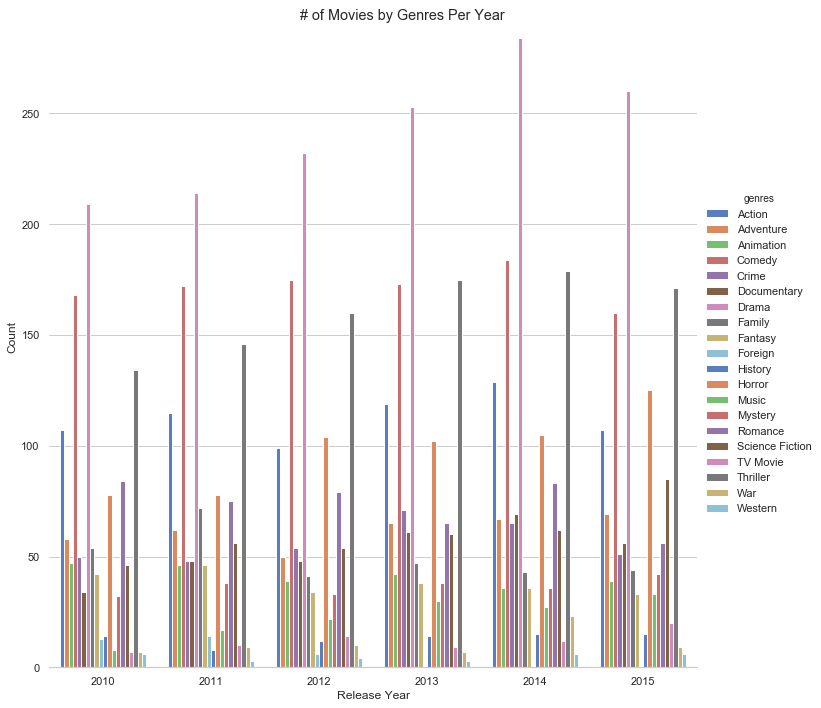

In [184]:
#expand the genres column to rows since the genres of each movie is stored in one cell and separated by '|'
s = df_clean['genres'].str.split('|').apply(Series, 1).stack()
s.index = s.index.droplevel(-1)
s.name = 'genres'

df_new = df_clean.copy() # create a copy of the df_clean dataset 
del df_new['genres']

df = df_new.join(s)

chart_df = df.groupby(['genres', 'release_year']).count()['director'].reset_index(name="count")
#chart_df = df.groupby('genres').count()['director'].reset_index(name="count")

sns.set(style="whitegrid");

#Plot 
g = sns.factorplot(x='release_year', y='count', hue='genres', data=chart_df.query('release_year >= 2010'),
                   size=10, kind="bar", palette="muted");
g.despine(left=True);
#g.set_title("Movies by Genres", fontsize=22, fontweight="bold")
g.set_ylabels("Count");
g.set_xlabels("Release Year");
g.fig.suptitle('# of Movies by Genres Per Year')

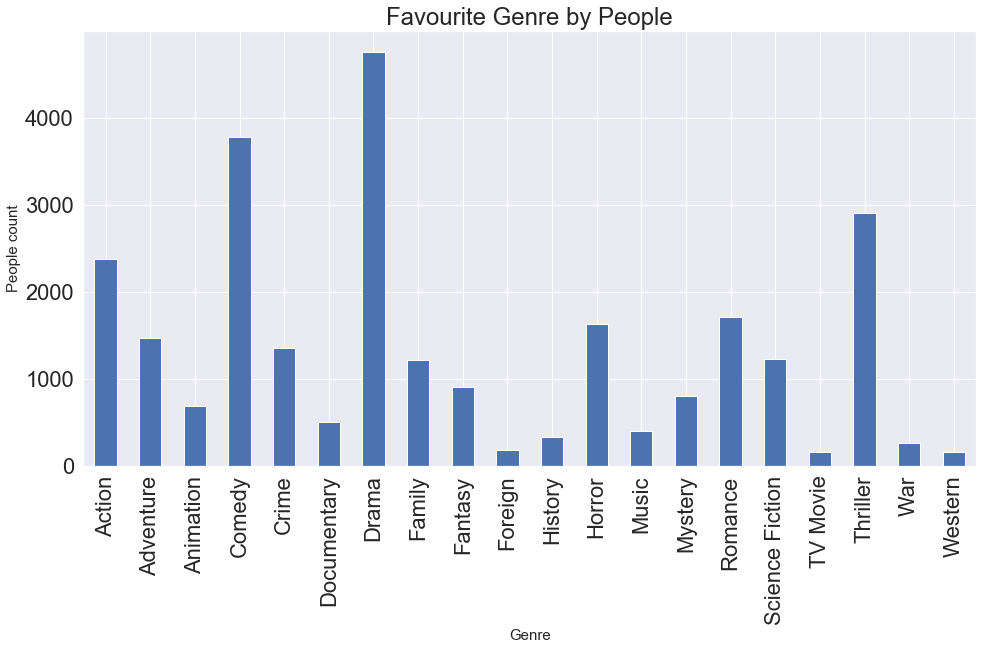

In [185]:
count2=df.groupby('genres').count()['director']
sns.set_style("whitegrid")
sns.set(font_scale=2);
count2.plot(kind='bar',title="Favourite Genre by People");
plt.xlabel('Genre',fontsize=15);
plt.ylabel('People count',fontsize=15);
plt.xticks(rotation=90);

### Research Question 4 (How is growth rate of entertinment industry over year?)
> In this we will see the hows the profit of movie chage over the years. So if you see in graph in some year profit decrease and increase. But over all the profit increase. specially after 2010 profit increase gradually.

In [186]:
df.insert(3, 'profit_loss', df['revenue'] - df['budget'])

In [187]:
df.head(3)

,popularity,budget,revenue,profit_loss,original_title,director,runtime,release_date,vote_count,vote_average,release_year,movie_rating,genres
0,32.985763,150000000,1513528810,1363528810,Jurassic World,Colin Trevorrow,124,2015-06-09,5562,6.5,2015,Above Average,Action
0,32.985763,150000000,1513528810,1363528810,Jurassic World,Colin Trevorrow,124,2015-06-09,5562,6.5,2015,Above Average,Adventure
0,32.985763,150000000,1513528810,1363528810,Jurassic World,Colin Trevorrow,124,2015-06-09,5562,6.5,2015,Above Average,Science Fiction


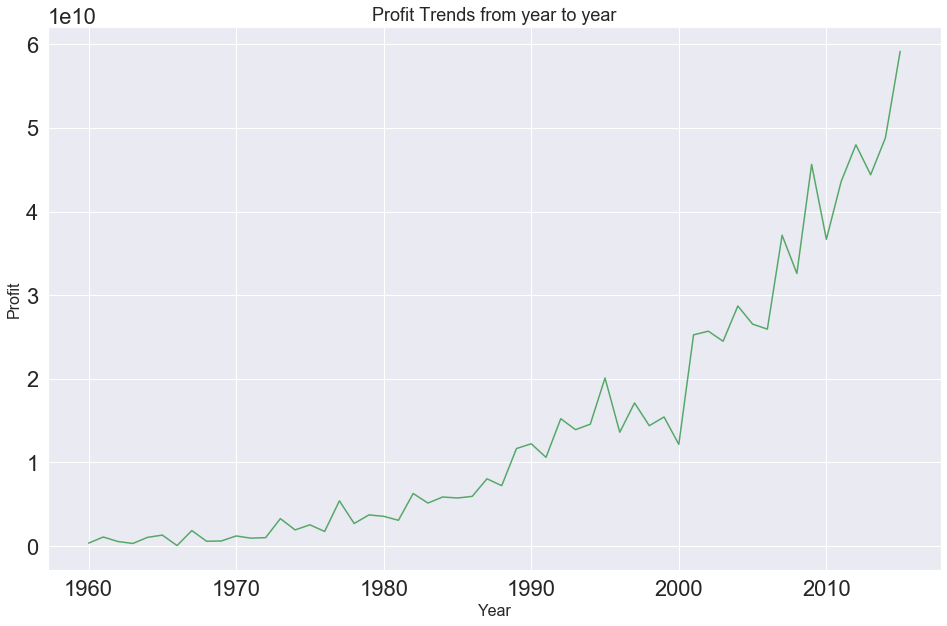

In [195]:
df.groupby('release_year')['profit_loss'].sum().plot(kind = 'line', figsize = (16, 10), color = 'g')
plt.title('Profit Trends from year to year', fontsize = 18)
plt.xlabel('Year', fontsize = 16)
plt.ylabel('Profit', fontsize = 16);

### Research Question 5 (What's the impact on rutime over year?)
> In this we see the over years the runtime of movie is decrese.So, to confirm it we will see here.

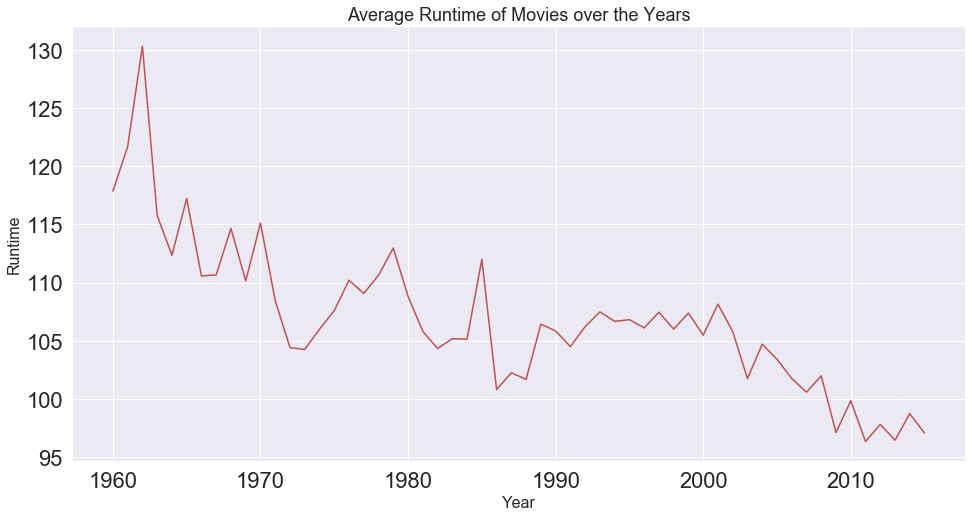

In [196]:
df.groupby('release_year')['runtime'].mean().plot(kind='line', figsize = (16, 8), color = 'r')
plt.title('Average Runtime of Movies over the Years', fontsize = 18)
plt.xlabel('Year', fontsize = 16)
plt.ylabel('Runtime', fontsize = 16);

### Research Question 6 (Which category of movie most peole watch as per rating?)
> In this we see persentage of geners people see the movies. As well movie rating and it's popularity.  

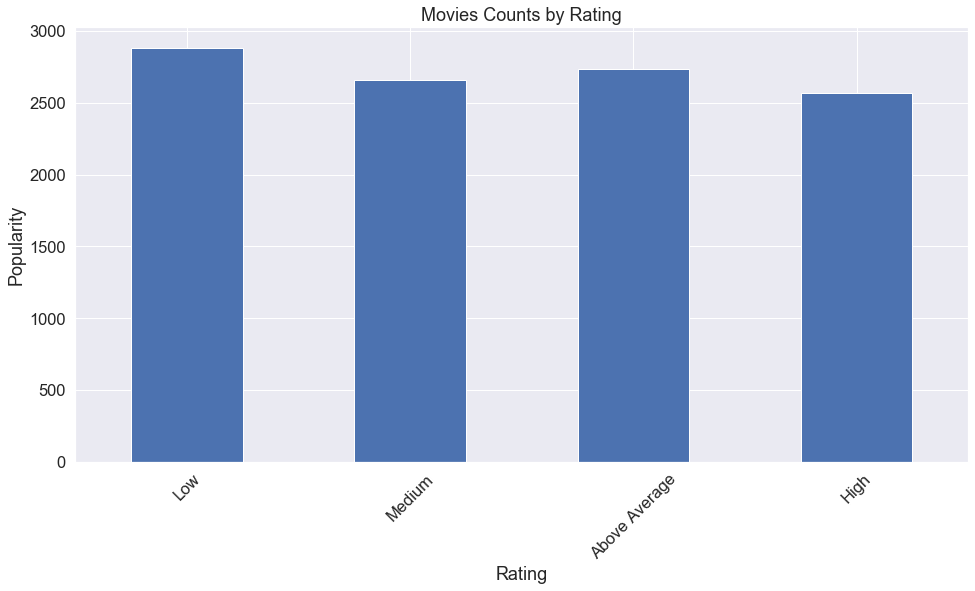

In [197]:
counts = df_drop.groupby('movie_rating').count()['genres'];
sns.set_style("whitegrid")
sns.set(font_scale=1.5);
counts.plot(kind = 'bar', title = 'Movies Counts by Rating');

plt.xlabel('Rating', fontsize = 18);
plt.ylabel('Popularity', fontsize = 18);
plt.xticks(rotation=45);

In [198]:
df_drop.groupby('movie_rating').count()['genres']

movie_rating
Low              2885
Medium           2658
Above Average    2734
High             2566
Name: genres, dtype: int64

In [199]:
def calculate_count(column):
    # Convert column to string and seperate it by '|'
    data = df_drop[column].str.cat(sep = '|')
    
    # Storing the values seperately in a Pandas series
    data = pd.Series(data.split('|'))
    count = data.value_counts(ascending = False)
    
    return count

In [200]:
count = calculate_count('genres')
#printing top 5 values
count.head()

Drama       4761
Comedy      3793
Thriller    2908
Action      2385
Romance     1712
dtype: int64

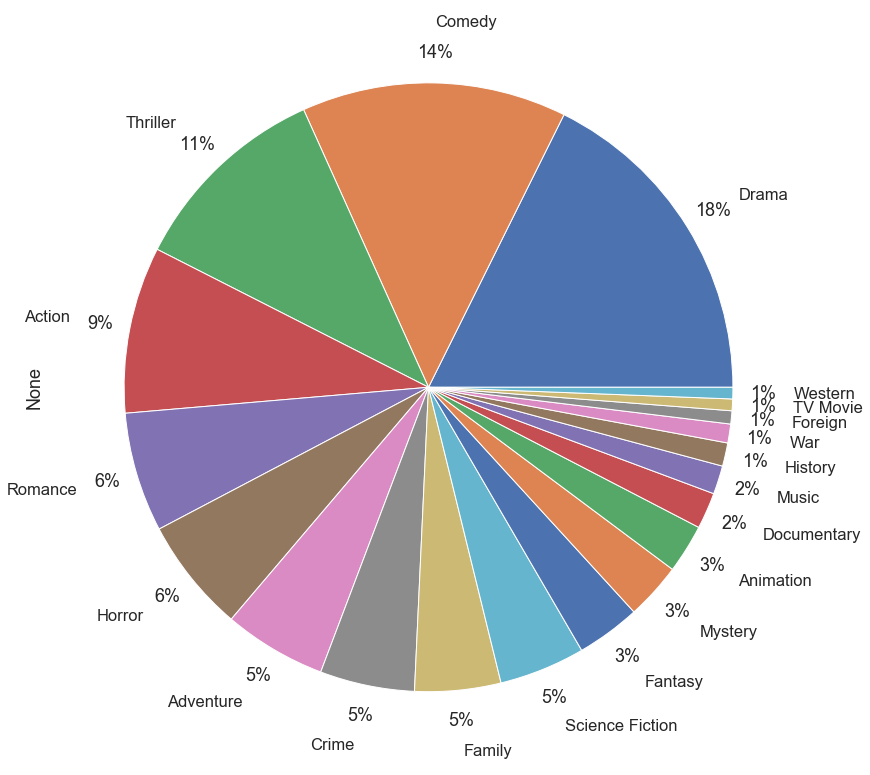

In [201]:
count.plot(kind='pie', figsize = (14, 14),autopct='%1.0f%%', pctdistance=1.1, labeldistance=1.2)

Text(0.5, 57.5, 'Release Year')

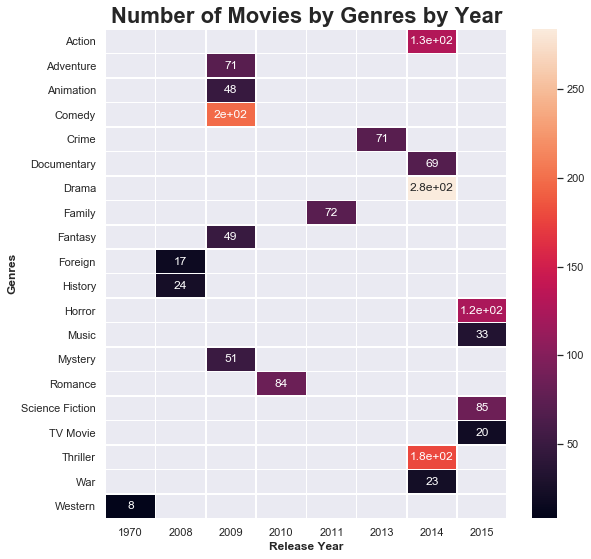

In [202]:
genres_count = chart_df.loc[chart_df.groupby(['genres'])['count'].idxmax()]

sns.set(style="darkgrid")

genres = genres_count.pivot("genres", "release_year", "count")

# Draw a heatmap with the numeric values in each cell
f, ax = plt.subplots(figsize=(9, 9))
g = sns.heatmap(genres, annot=True,  linewidths=0.5, ax=ax)
g.set_title("Number of Movies by Genres by Year", fontsize=22, fontweight="bold")
g.set_ylabel("Genres", fontsize=12, fontweight="bold")
g.set_xlabel("Release Year", fontsize=12, fontweight="bold")

<a id='conclusions'></a>
## Conclusions

> 1. It is not necessary high bugest movies make high revenue.
> 2. Peoples love watching Drama movies move compare to other
> 3. Peoples see more Low rating movies.
> 4. Over a year profit or revenue increase very fast.
> 5. Producer make high revenue by making movie in between 1.30 hours to 2 hours.
> 6. Over a years rutime of movie is drecrease and people love those movies.
> 7. In 2015, Horror movies are made more and people love thriller movie more.

## Limitation
> 1. The data provided is fully correct and up to date.
> 2. The budget and revenue don't have the currency unit.so we don't know the profit is which currency unit.
> 3. There are some missing rows or values which may affect the results.